In [ ]:
# Step 1: Importing the required libraries 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


In [2]:
# Step 2: Loading and Cleaning the data 

In [4]:
X = pd.read_csv('CC_GENERAL.csv')

# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)


In [ ]:
# Step 3: Preprocessing the data 

In [5]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


In [ ]:
# Step 4: Reducing the dimensionality of the Data 

In [6]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


In [ ]:
# Step 5: Visualizing the working of the Dendrograms 

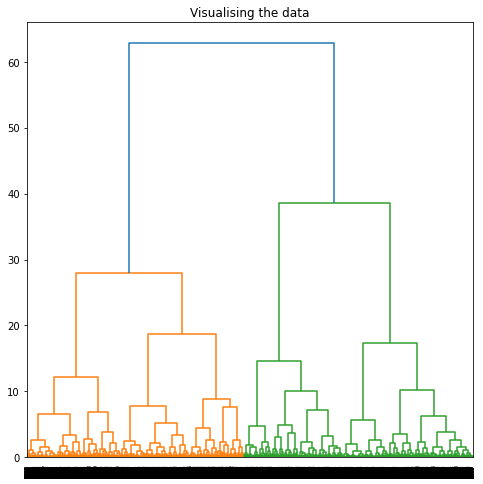

In [7]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))


In [ ]:
# Step 6: Building and Visualizing the different clustering models for different values of k a) 
# k = 2 

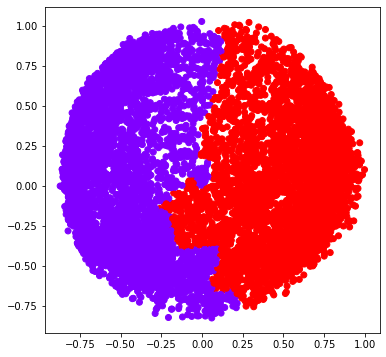

In [8]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()


In [ ]:
# b) k = 3 

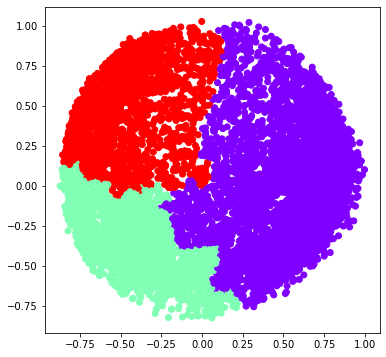

In [9]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()


In [ ]:
# c) k = 4

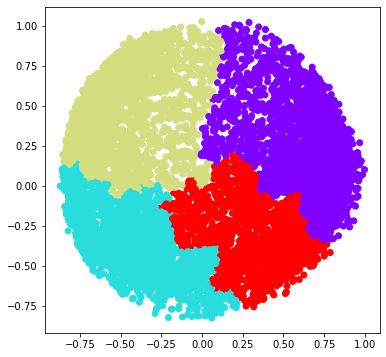

In [10]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
			c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()


In [ ]:
# d) k = 5

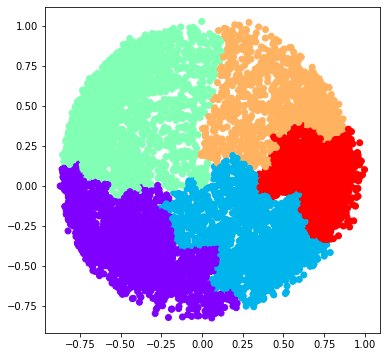

In [11]:
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
			c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()


In [ ]:
# e) k = 6

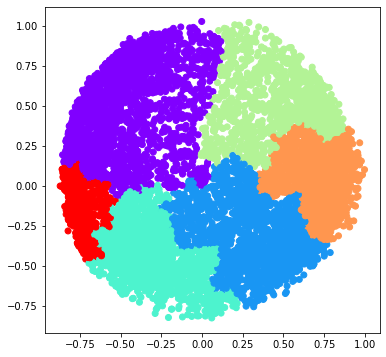

In [12]:
ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
			c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()


In [ ]:
# Step 7: Evaluating the different models and Visualizing the results. 

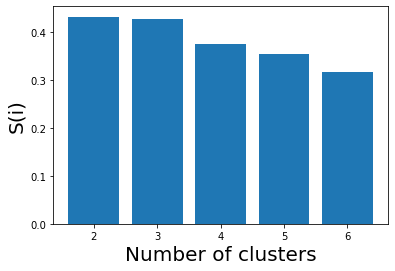

In [13]:
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


In [ ]:
# Thus, with the help of the silhouette scores, it is concluded that the optimal number of 
# clusters for the given data and clustering technique is 2.